<a href="https://colab.research.google.com/github/hosodakazufumi/note/blob/main/efficientnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
########## import ##########
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from skimage.io import imread
import cv2

In [3]:
##########  model ##########

model = tf.keras.applications.efficientnet.EfficientNetB0()
insize = model.input_shape[1:3]
print('model input_shape =', insize)
print('model output shape =', model.output_shape)


model input_shape = (224, 224)
model output shape = (None, 1000)


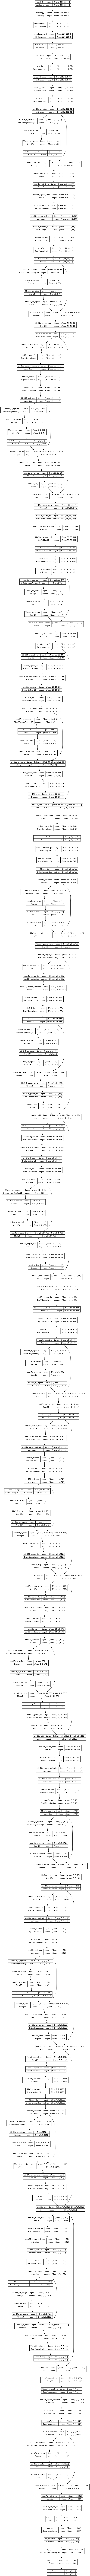

In [4]:
tf.keras.utils.plot_model(model, show_shapes=True)


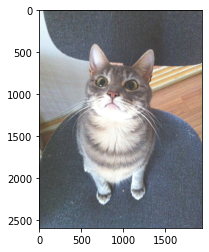

In [5]:
########## Example data load ##########
a = "https://raw.githubusercontent.com/hosodakazufumi/note/master/data/IMG_2389.png"
image = imread(a)
plt.imshow(image)

In [11]:
x = cv2.resize(image, (224, 224)) # = insize
x = tf.keras.applications.efficientnet.preprocess_input(x)
x = np.expand_dims(x, 0)
#x = np.transpose( np.array(x).copy() , (0,3,1,2))
y = model.predict(x)
print(y.shape)
print(y[0,:20])
y.argmax()

1/1 [==============================] - 0s 252ms/step
(1, 1000)
[1.3574005e-04 8.3314255e-05 1.1926013e-04 5.9811835e-04 1.2653503e-04
 3.0959191e-04 1.4228711e-04 1.3480964e-04 1.1384738e-04 1.1012516e-04
 4.0360210e-05 5.1251725e-05 1.5992523e-04 3.9922385e-04 1.1881189e-04
 1.8375754e-04 1.8820466e-04 6.1182689e-04 3.3790144e-04 1.3307092e-04]


281

In [12]:
import pandas as pd
a = "https://raw.githubusercontent.com/noameshed/novelty-detection/master/imagenet_categories_synset.csv"
imnet_label = pd.read_csv( a )
imnet_label

,index,synset,words,categories
0,0,n01440764,"tench, Tinca tinca",fish
1,1,n01443537,"goldfish, Carassius auratus",fish
2,2,n01484850,"great white shark, white shark, man-eater, man...",shark
3,3,n01491361,"tiger shark, Galeocerdo cuvieri",shark
4,4,n01494475,"hammerhead, hammerhead shark",shark
...,...,...,...,...
995,995,n13044778,earthstar,fungus
996,996,n13052670,"hen-of-the-woods, hen of the woods, Polyporus ...",fungus
997,997,n13054560,bolete,fungus
998,998,n13133613,"ear, spike, capitulum",food


In [13]:
imnet_label.iloc[y.argmax(),:]

index                      281
synset               n02123045
words         tabby, tabby cat
categories                 cat
Name: 281, dtype: object

In [14]:
########## 全部通すと ##########
x = cv2.resize(image, (224, 224)) # = insize
x = tf.keras.applications.efficientnet.preprocess_input(x)
x = np.expand_dims(x, 0)
y = model.predict(x)
imnet_label.iloc[y.argmax(),:]

1/1 [==============================] - 0s 151ms/step


index                      281
synset               n02123045
words         tabby, tabby cat
categories                 cat
Name: 281, dtype: object